<a href="https://colab.research.google.com/github/mlkbrv/MachineLearningPorjects/blob/main/PCATest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/cancer_tumor_data_features.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

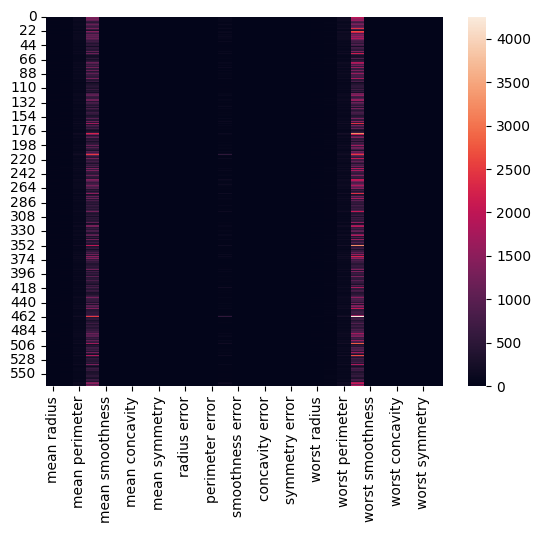

In [5]:
sns.heatmap(df)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [10]:
scaled_X = scaler.fit_transform(df)

In [12]:
scaled_X.mean(axis=0)

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
       -8.36667193e-16,  1.87313551e-16,  4.99502802e-17, -4.99502802e-17,
        1.74825981e-16,  4.74527662e-16,  2.37263831e-16, -1.12388130e-16,
       -1.12388130e-16, -1.31119486e-16, -1.52972733e-16,  1.74825981e-16,
        1.62338411e-16,  0.00000000e+00,  8.74129903e-17, -6.24378502e-18,
       -8.24179623e-16,  1.24875700e-17, -3.74627101e-16,  0.00000000e+00,
       -2.37263831e-16, -3.37164391e-16,  7.49254203e-17,  2.24776261e-16,
        2.62238971e-16, -5.74428222e-16])

In [13]:
covariance_matrix = np.cov(scaled_X,rowvar=False)

In [14]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [15]:
num_components = 2

In [18]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [19]:
sorted_key

array([0, 1])

In [20]:
eigen_values,eigen_vectors = eigen_values[sorted_key],eigen_vectors[:,sorted_key]

In [21]:
principal_components = np.dot(scaled_X,eigen_vectors)

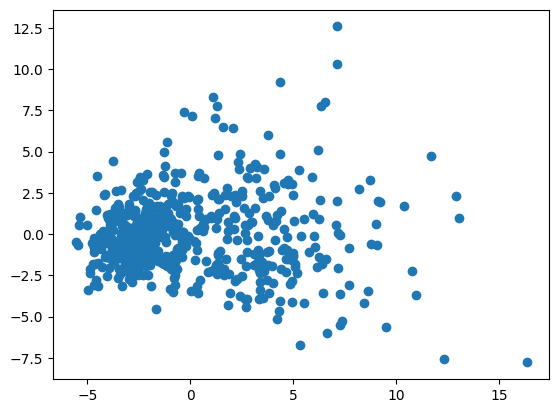

In [22]:
plt.scatter(principal_components[:,0],principal_components[:,1])

In [23]:
from sklearn.datasets import load_breast_cancer

In [24]:
cancer_dictionary = load_breast_cancer()

In [25]:
type(cancer_dictionary)

sklearn.utils._bunch.Bunch

In [26]:
print(cancer_dictionary['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Text(0, 0.5, 'Second Principal Component')

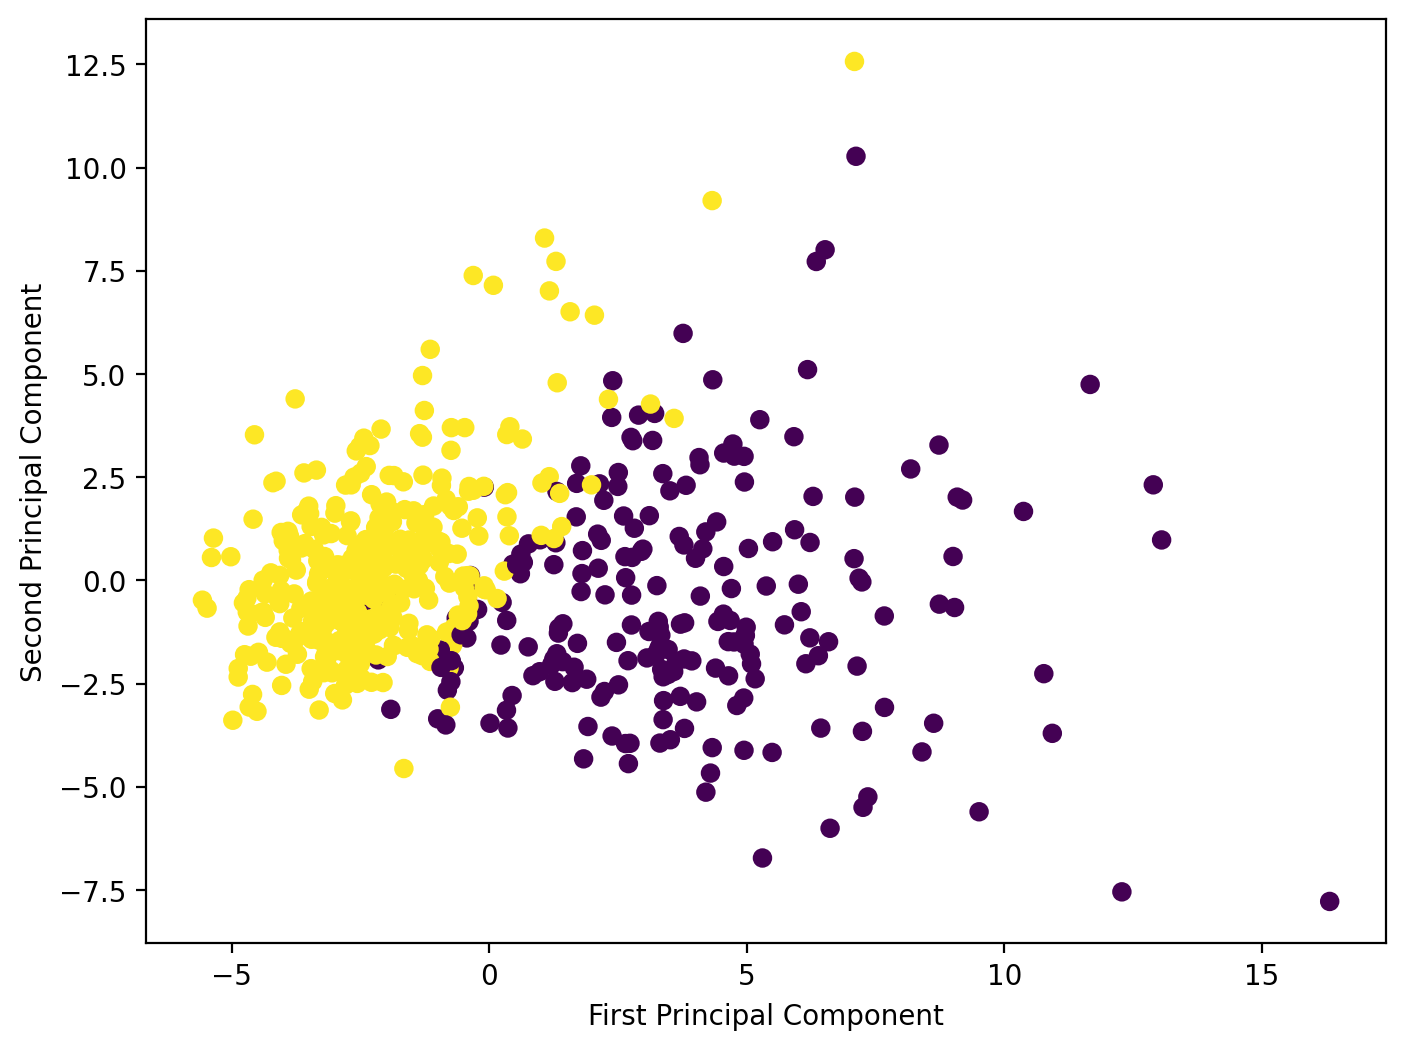

In [27]:
plt.figure(figsize=(8,6),dpi=200)
plt.scatter(principal_components[:,0],principal_components[:,1],c=cancer_dictionary['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [28]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca_model = PCA(n_components=2)

In [33]:
pc_results = pca_model.fit_transform(scaled_X)

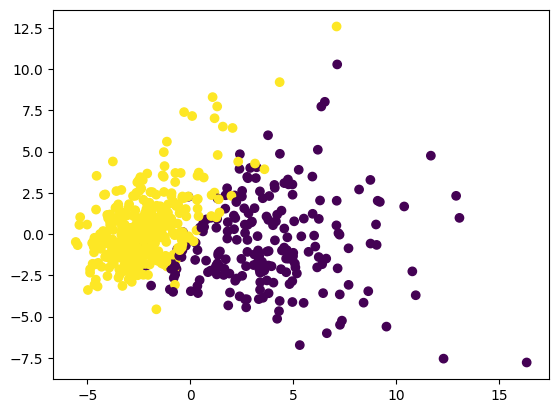

In [34]:
plt.scatter(pc_results[:,0],pc_results[:,1],c=cancer_dictionary['target'])

In [36]:
pca_model.components_.shape

(2, 30)

In [37]:
df_components = pd.DataFrame(data=pca_model.components_,columns=df.columns)

In [38]:
df_components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<Axes: >

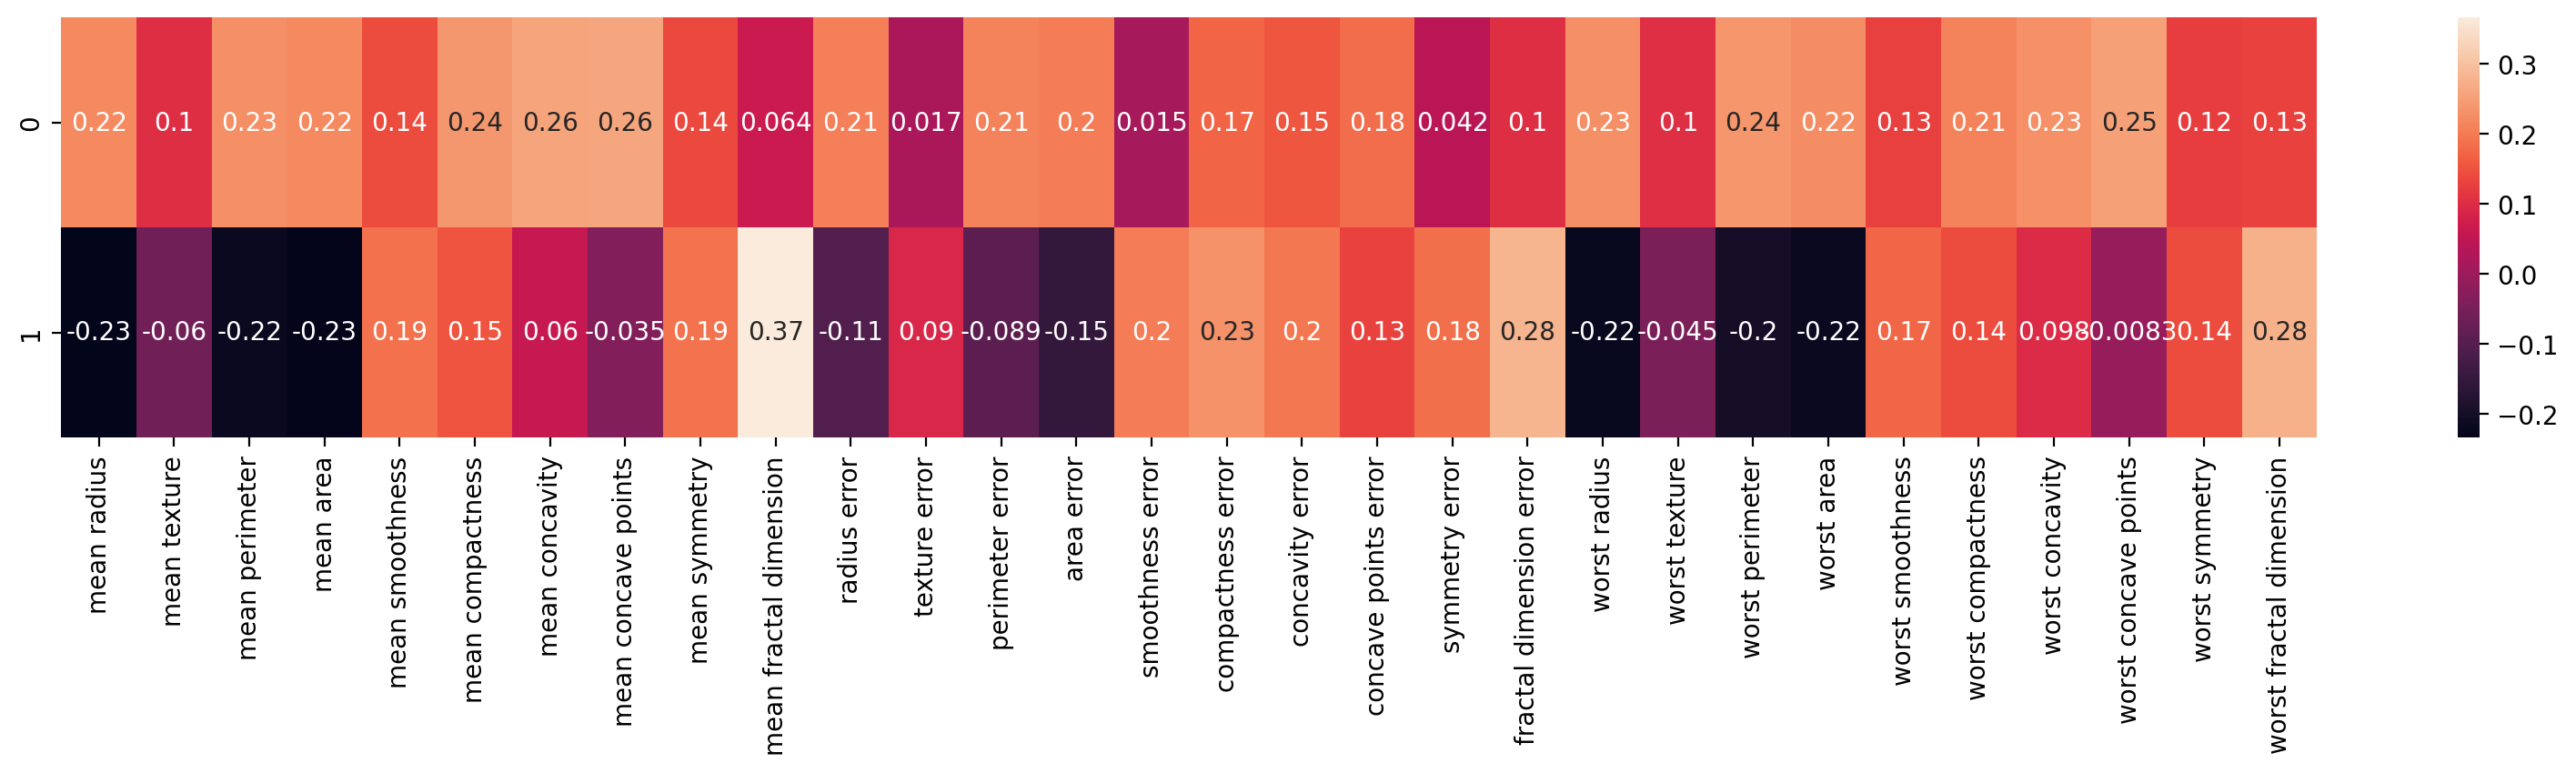

In [40]:
plt.figure(figsize=(20,3),dpi=200)
sns.heatmap(df_components,annot=True)

In [41]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [42]:
np.sum(pca_model.explained_variance_ratio_)

np.float64(0.6324320765155944)

In [43]:
pca_30 = PCA(n_components=30)

In [44]:
pca_30.fit(scaled_X)

PCA(n_components=30)

In [46]:
np.sum(pca_30.explained_variance_ratio_)

np.float64(1.0000000000000002)

In [49]:
explaied_variance = []

for n in range(1,30):
  pca = PCA(n_components=n)
  pca.fit(scaled_X)
  explaied_variance.append(np.sum(pca.explained_variance_ratio_))

In [50]:
explaied_variance

[np.float64(0.44272025607526366),
 np.float64(0.6324320765155944),
 np.float64(0.7263637090899083),
 np.float64(0.7923850582446098),
 np.float64(0.8473427431680725),
 np.float64(0.887587963566906),
 np.float64(0.9100953006967311),
 np.float64(0.9259825386969442),
 np.float64(0.9398790324425353),
 np.float64(0.9515688143366668),
 np.float64(0.9613660042126471),
 np.float64(0.9700713832200258),
 np.float64(0.9781166330919931),
 np.float64(0.9833502905469195),
 np.float64(0.9864881227145469),
 np.float64(0.9891502160796992),
 np.float64(0.9911301840050235),
 np.float64(0.9928841434552499),
 np.float64(0.994533396514475),
 np.float64(0.9955720432628138),
 np.float64(0.996571139726514),
 np.float64(0.9974857864775684),
 np.float64(0.9982971477364675),
 np.float64(0.9988989813031391),
 np.float64(0.9994150236823043),
 np.float64(0.9996876116777818),
 np.float64(0.9999176271402878),
 np.float64(0.9999706050693259),
 np.float64(0.9999955651725728)]

(0.0, 1.0)

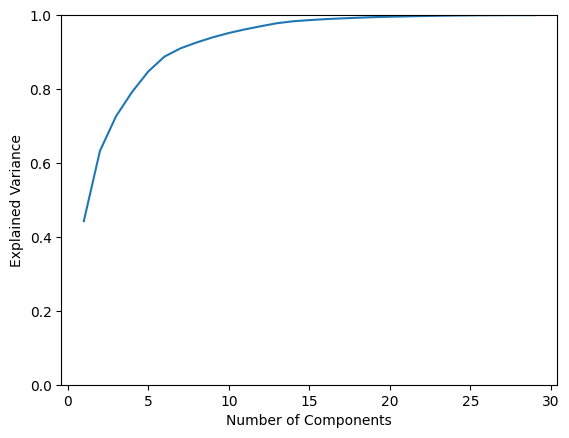

In [52]:
plt.plot(range(1,30),explaied_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.ylim(0,1)